**UDA CITY PROJECT**

in this project I chose dataset from Airbnb website which is 'listings'.

## 1. Business Understanding
- **Objective**: The goal is to understand the factors that influence the pricing of real estate properties and predict the price based on certain features.
- **Questions**:
  - Q1: Is a home/apartment with a minimum night stay more expensive?
  - Q2: Does the price increase with an increase in space?
  - Q3: Which type of room is usually more busy (less available)?

## 2. Data Understanding
- The dataset consists of real estate listings with features like latitude, longitude, room type, minimum nights, availability, and price.
- Understanding the columns that contain missing values and handling them appropriately.


In [1]:
#here I imported the nacassery files.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

#Read the csv file 
df = pd.read_csv('listings.csv')

In [2]:
#Display the first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,257.0,1,41,2024-05-02,0.30,27,177,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,249.0,3,78,2024-05-20,0.48,1,178,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,240.0,1,121,2024-06-05,0.77,2,204,30,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,229.0,5,13,2024-05-06,0.08,3,70,5,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,450.0,5,234,2024-06-03,1.40,3,222,29,HUTB-150671


In [4]:
#the columns that have missing values
missing_value_cols = set(df.columns[df.isnull().sum() != 0])
print(f"Columns with missing values: {missing_value_cols}")

Columns with missing values: {'last_review', 'price', 'license', 'reviews_per_month', 'host_name'}


## 3. Data Preparation
- **Handling Missing Values**: We removed rows with missing values using `dropna()`.
  - **Justification**: This method was chosen to ensure the integrity of the dataset, and it was appropriate because the dataset is large, so removing rows won't significantly impact the analysis.
- **Feature Selection**: Focused on specific columns that are relevant for analysis.

In [5]:
#remove all rows that have missing values.
new_df = df.dropna(axis= 0)

In [7]:
# Check the shape of the original and new dataframes
print(f"Original dataframe shape: {df.shape}")
print(f"New dataframe shape after dropping missing values: {new_df.shape}")

Original dataframe shape: (18925, 18)
New dataframe shape after dropping missing values: (9640, 18)


In [8]:
# Display the first 5 rows of the cleaned data
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,257.0,1,41,2024-05-02,0.30,27,177,5,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,249.0,3,78,2024-05-20,0.48,1,178,7,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,240.0,1,121,2024-06-05,0.77,2,204,30,HUTB-001722
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,229.0,5,13,2024-05-06,0.08,3,70,5,Exempt
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,450.0,5,234,2024-06-03,1.40,3,222,29,HUTB-150671


## 4. Data Modeling
- We will use a linear regression model to predict the price based on latitude, longitude, minimum nights, and availability.
- The dataset is split into training and testing sets.

In [11]:
#below variable ans_df with 6 columns of the data frame
ans_df = df[['latitude', 'longitude', 'room_type', 'minimum_nights', 'availability_365', 'price']]
ans_df.head()

,latitude,longitude,room_type,minimum_nights,availability_365,price
0,41.405560,2.17262,Entire home/apt,1,177,257.0
1,41.412432,2.21975,Entire home/apt,3,178,249.0
2,41.405660,2.17015,Entire home/apt,1,204,240.0
3,41.380620,2.17517,Entire home/apt,5,70,229.0
4,41.379780,2.17623,Entire home/apt,5,222,450.0


In [13]:
# Define variables for the model
num_vars = ans_df[['price', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'availability_365']]
df_dropna = num_vars.dropna(axis=0)

#Split into explanatory and response variables
X = df_dropna[['latitude', 'longitude', 'minimum_nights', 'availability_365']]
y = df_dropna['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

#Instantiate the linear regression model
lm_model = LinearRegression() 

#Fit the model
lm_model.fit(X_train, y_train) 
        
#Predict and evaluate the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.033076928440168296 on 4557 values.'

## 5. Evaluate the Results
- **R-squared score**: Evaluated to measure how well the model predicts the price.
- Visualizing the relationships to answer the initial business questions.

AttributeError: module 'matplotlib' has no attribute 'title'

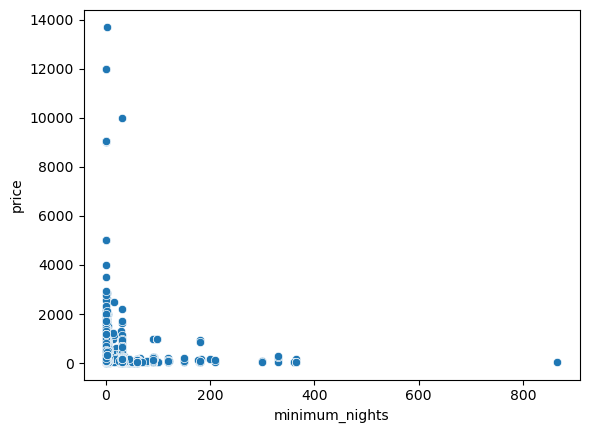

In [14]:
# Visualize the relationship between minimum nights and price
sns.scatterplot(x='minimum_nights', y='price', data=df_dropna)
plt.title("Price vs. Minimum Nights")

AttributeError: module 'matplotlib' has no attribute 'title'

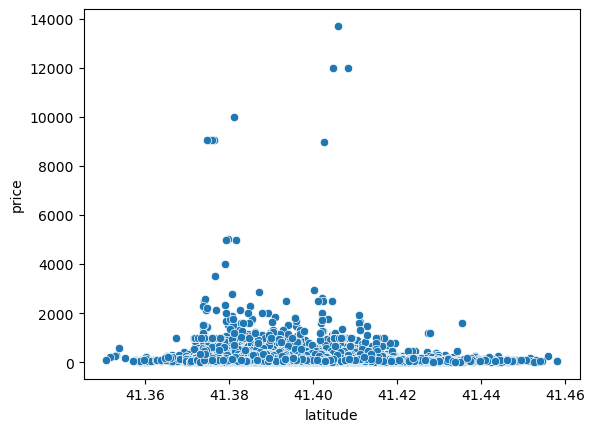

In [15]:
# Visualize the relationship between latitude and price
sns.scatterplot(x='latitude', y='price', data=df_dropna)
plt.title("Price vs. Latitude")

AttributeError: module 'matplotlib' has no attribute 'title'

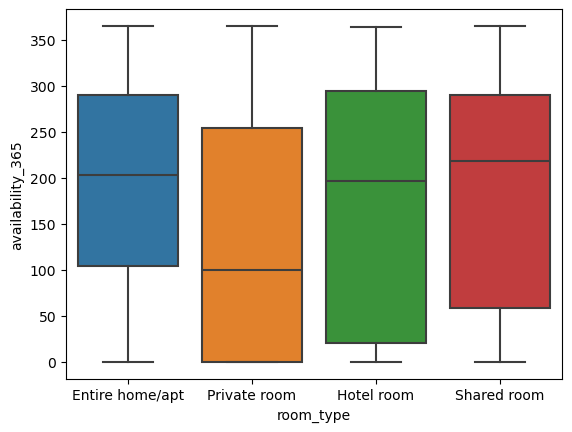

In [16]:
# Visualize room type vs. availability
sns.boxplot(x='room_type', y='availability_365', data=df)
plt.title("Room Type vs. Availability (365 days)")

AttributeError: module 'matplotlib' has no attribute 'title'

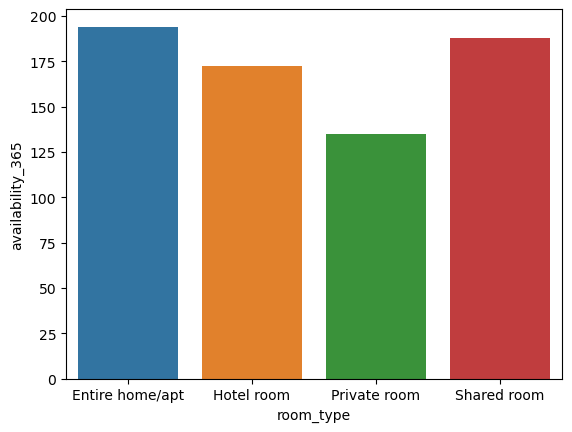

In [17]:
# Bar plot to show average availability by room type
room_availability = df.groupby('room_type')['availability_365'].mean().reset_index()
sns.barplot(x='room_type', y='availability_365', data=room_availability)
plt.title("Average Availability by Room Type")

## 6. Conclusion
- **Summary of Findings**: 
  - Homes with longer minimum nights are not necessarily more expensive based on the scatter plot.
  - The price shows variation with latitude but other factors also play a role.
  - Certain room types have higher availability, indicating different levels of demand.

## Further Work
- Exploring other models like decision trees or random forests.
- Further feature engineering and handling outliers to improve the model.